#  SPARK FOUNDATION - #GRIPJUNE21

## DATA SCIENCE & BUSINESS ANALYTICS TASKS

### Task 1 : Prediction Using Supervised ML

#### **Author - Rita Kushwaha**

* __Data Set - http://bit.ly/w-data__

* __Problem Statement -__
What will be predicted score if a student studies for 9.25 hrs/ day using simple Linear Regression with Python Scikit Learn?

__Simple Linear Regression -__
In this regression task we will *predict the percentage of marks* that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Importing the required libraries
* **pandas** - used for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
* **numpy** - used for working with arrays and matrices.
* **matplotlib.pyplot** - used for data visualization and graphical plotting library.
* **%matplotlib inline** - magic function that renders the figure in a notebook




In [3]:
# Importing all libraries required in this notebook
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## DataSet
https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url) # pandas function to read csv file
print("Data imported successfully")

s_data.head(5) # this gives first 5 data rows

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Insights of data**

In [5]:
# Finding the shape of dataset
s_data.shape # 25 rows, 2 columns

(25, 2)

In [6]:
# Checking for Null values
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [23]:
# Describing data
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [20]:
s_data.isnull().sum() # check if any missing data is there

Hours     0
Scores    0
dtype: int64

**There is not null value in dataset.**

## 2-D Graph Potting
Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

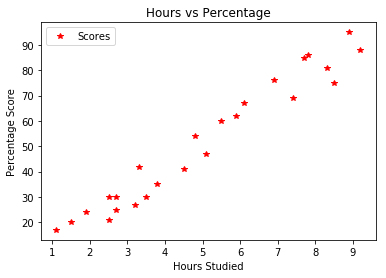

In [21]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='*', c= 'red')  # we can give any style to the data-points
plt.title('Hours vs Percentage')  # gives title of the chart
plt.xlabel('Hours Studied')  # x-axis name
plt.ylabel('Percentage Score')  # y-axis name
plt.show() # this will show the graph in notebook

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [23]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**This proved that if student spent more hours in study then they will score more.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
x = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

**Split data** into training and test sets.

In [24]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

**Training**
We have split our data into training and testing sets, and now is finally the time to train. 

In [25]:
from sklearn.linear_model import LinearRegression  
regrsn = LinearRegression()  
regrsn.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In [26]:
# Finding out INTERCEPT value and LINEAR Coefficient
print('Intercept value is:', regrsn.intercept_)
print('Linear cofficient is :' , regrsn.coef_)

Intercept value is: 2.018160041434683
Linear cofficient is : [9.91065648]


**Plotting of regression line**

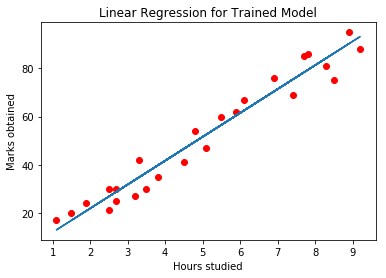

In [28]:
# Plotting the regression line
reg_line = regrsn.coef_*x+regrsn.intercept_

# Plotting for the test data

plt.scatter(x,y,c='red')
plt.title('Linear Regression for Trained Model')
plt.xlabel('Hours studied')
plt.ylabel('Marks obtained')
plt.plot(x,reg_line)
plt.show()


### **Making Predictions**

In [15]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [29]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [30]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**
**Mean Absolute Error**

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
